In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


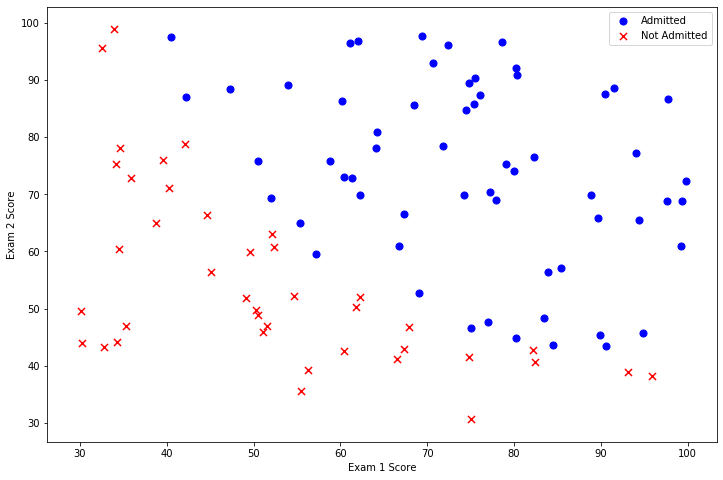

In [178]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [179]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

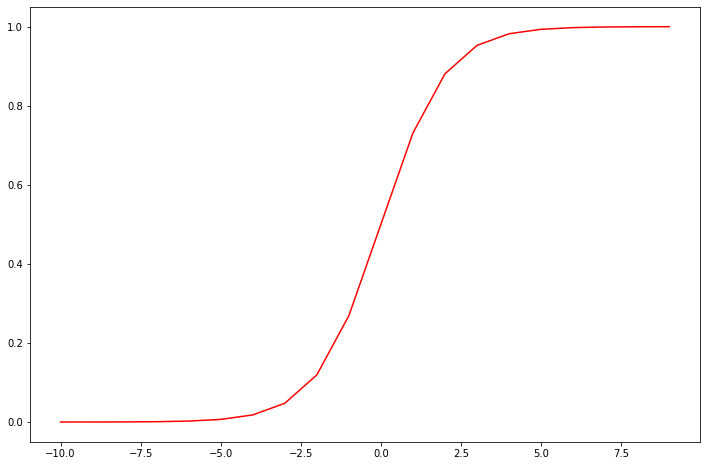

In [180]:
nums = np.arange(-10, 10, step=1)
nums = np.asmatrix(nums)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums.T, sigmoid(nums.T), 'r')
plt.show()

In [181]:
def cost_function(theta, X, y):
    theta = np.asmatrix(theta)
    X = np.asmatrix(X)
    y = np.asmatrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log((1 - sigmoid(X * theta.T))))
    
    return np.sum((1./len(X)) * (first - second))

In [182]:
def gradient_function(theta, X, y):
    theta = np.asmatrix(theta)
    X = np.asmatrix(X)
    y = np.asmatrix(y)
    
    return (1./len(X)) * np.dot(X.T, (sigmoid(X * theta.T) - y))


In [183]:
data.insert(0, "Ones", 1)
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [184]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
theta = np.array(np.zeros(3))

In [185]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [186]:
cost_function(theta, X, y)

0.6931471805599457

In [187]:
gradient_function(theta, X, y)

matrix([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]])

In [188]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient_function, args=(X, y))
result

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)

In [189]:
def predict(theta, X):
    theta = np.asmatrix(theta)
    X = np.asmatrix(X)
    
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [190]:
theta_min = result[0]
predictions = predict(theta_min, X)
correct = [1 if (x == 0 and y == 0) or (x == 1 and y == 1) else 0 for (x, y) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))


accuracy = 89%


In [191]:
data_path2 = "ex2data2.txt"
data2 = pd.read_csv(data_path2, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


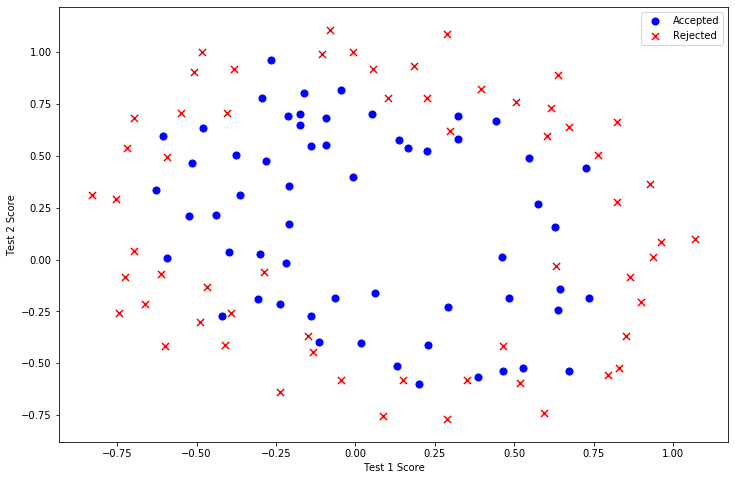

In [192]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [193]:
loc = data2.shape[1]
X = data2.iloc[:, 0:loc - 1]
y = data2.iloc[:, loc - 1: loc]
X = np.array(X.values)
y = np.array(y.values)

In [194]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=6)
poly_X=poly.fit_transform(X)
poly_X.shape[1]

28

In [195]:
def cost_function_with_reg(theta, X, y, rate):
    theta = np.asmatrix(theta)
    X = np.asmatrix(X)
    y = np.asmatrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log((1 - sigmoid(X * theta.T))))
    reg = (float(rate)/2 * len(X)) * theta[:, 1:theta.shape[1]] * theta[:, 1:theta.shape[1]].T
    
    return np.sum(first - second) / len(X) + reg

In [196]:
theta = np.array(np.zeros(poly_X.shape[1]))
cost_function_with_reg(theta, poly_X, y, 0)

matrix([[0.69314718]])

In [197]:
def gradient_function_with_reg(theta, X, y, rate):
    theta = np.asmatrix(theta)
    X = np.asmatrix(X)
    y = np.asmatrix(y)
    gradient_reg = (float(rate) / len(X)) * theta[:,1:theta.shape[1]]
    regularized_term = np.concatenate([np.asmatrix([0]), gradient_reg.T])
    
    return gradient_function(theta, X, y) + regularized_term

In [198]:
learning_rate = 5

In [199]:
gradient_function_with_reg(theta, poly_X, y, learning_rate)

matrix([[8.47457627e-03],
        [1.87880932e-02],
        [7.77711864e-05],
        [5.03446395e-02],
        [1.15013308e-02],
        [3.76648474e-02],
        [1.83559872e-02],
        [7.32393391e-03],
        [8.19244468e-03],
        [2.34764889e-02],
        [3.93486234e-02],
        [2.23923907e-03],
        [1.28600503e-02],
        [3.09593720e-03],
        [3.93028171e-02],
        [1.99707467e-02],
        [4.32983232e-03],
        [3.38643902e-03],
        [5.83822078e-03],
        [4.47629067e-03],
        [3.10079849e-02],
        [3.10312442e-02],
        [1.09740238e-03],
        [6.31570797e-03],
        [4.08503006e-04],
        [7.26504316e-03],
        [1.37646175e-03],
        [3.87936363e-02]])

In [200]:
result = opt.fmin_tnc(func=cost_function_with_reg, x0=theta, fprime=gradient_function_with_reg, args=(poly_X, y, learning_rate))
result

(array([ 1.25148893e-04,  2.51755422e-05,  8.51189953e-05, -1.71937195e-04,
        -4.47698099e-05, -9.86839507e-05, -1.34612687e-05, -2.31817934e-05,
        -2.20483657e-05, -3.55788578e-05, -1.32500771e-04, -3.91683844e-06,
        -4.69597883e-05, -1.00168668e-05, -1.11259262e-04, -3.75269911e-05,
        -1.51091785e-05, -7.27534109e-06, -2.01021102e-05, -1.51524165e-05,
        -7.20313880e-05, -9.91746845e-05, -1.67765195e-07, -2.36056389e-05,
         4.69242523e-07, -2.60233795e-05, -3.65145013e-06, -1.07903903e-04]),
 94,
 4)

In [201]:
theta_min = result[0]
predictions = predict(theta_min, poly_X)
correct = [1 if (x == 0 and y == 0) or (x == 1 and y == 1) else 0 for (x, y) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 94%


In [202]:
def find_decision_boundary(density, power, theta, threshhold):
    theta = np.asmatrix(theta)
    
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)
    
    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    X = np.vstack((x_cord, y_cord)).T
    poly_X = feature_mapping(x_cord, y_cord, power)

    inner_product = np.asmatrix(poly_X.values) * theta.T

    decision = poly_X[np.abs(sigmoid(inner_product) - 0.5) < threshhold]

    return decision.f10, decision.f01

In [203]:
def feature_mapping(x, y, power, as_ndarray=False):
#     """return mapped features as ndarray or dataframe"""
    # data = {}
    # # inclusive
    # for i in np.arange(power + 1):
    #     for p in np.arange(i + 1):
    #         data["f{}{}".format(i - p, p)] = np.power(x, i - p) * np.power(y, p)

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)


In [204]:
def feature_mapped_logistic_regression(X, y, power, l):
    X = np.asmatrix(X)
    y = np.asmatrix(y)
    
    poly=PolynomialFeatures(degree=power)
    poly_X=poly.fit_transform(X)
    theta = np.asmatrix(np.zeros(poly_X.shape[1]))
    
    result = opt.fmin_tnc(func=cost_function_with_reg, x0=theta, fprime=gradient_function_with_reg, args=(poly_X, y, learning_rate))
    
    return result
    

In [205]:
def draw_boundary(power, l):
#     """
#     power: polynomial power for mapped feature
#     l: lambda constant
#     """
    density = 1000
    threshhold = 1 * pow(10, -7)

    data_path2 = "ex2data2.txt"
    data2 = pd.read_csv(data_path2, header=None, names=['Test 1', 'Test 2', 'Accepted'])
    loc = data2.shape[1]
    X = data2.iloc[:, 0:loc - 1]
    y = data2.iloc[:, loc - 1: loc]
    X = np.array(X.values)
    y = np.array(y.values)

    final_theta = feature_mapped_logistic_regression(X, y, power, l)
    px, py = find_decision_boundary(density, power, final_theta[0], threshhold)

    positive = data2[data2['Accepted'].isin([1])]
    negative = data2[data2['Accepted'].isin([0])]

    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
    ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
    ax.scatter(px, py, c='g', s=2)
    ax.legend()
    ax.set_xlabel('Test 1 Score')
    ax.set_ylabel('Test 2 Score')
   
    plt.show()

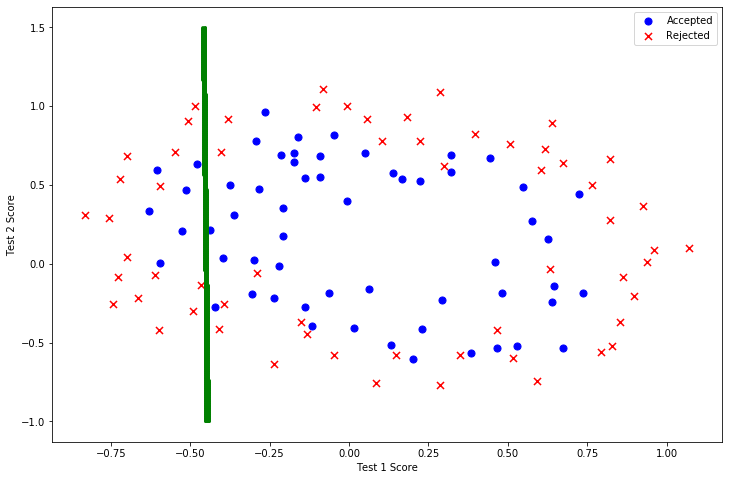

In [206]:
draw_boundary(power=1, l=0)

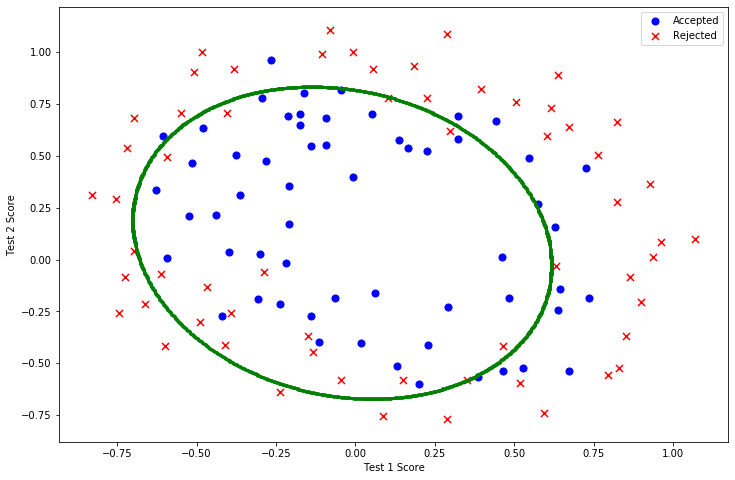

In [207]:
draw_boundary(power=2, l=0)

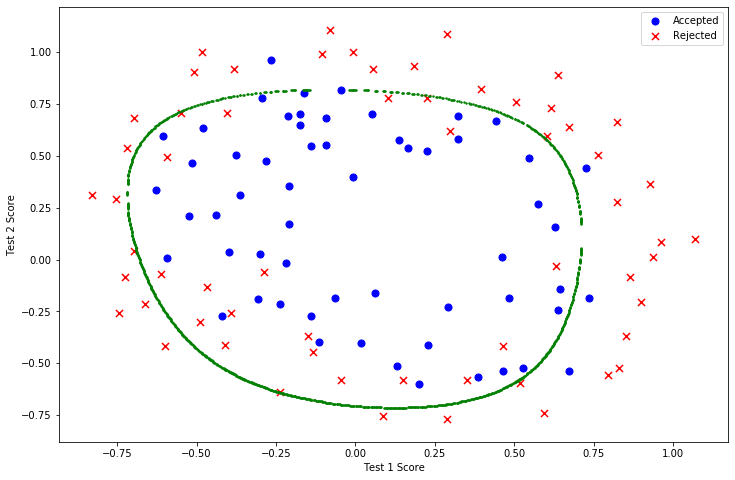

In [208]:
draw_boundary(power=6, l=0)

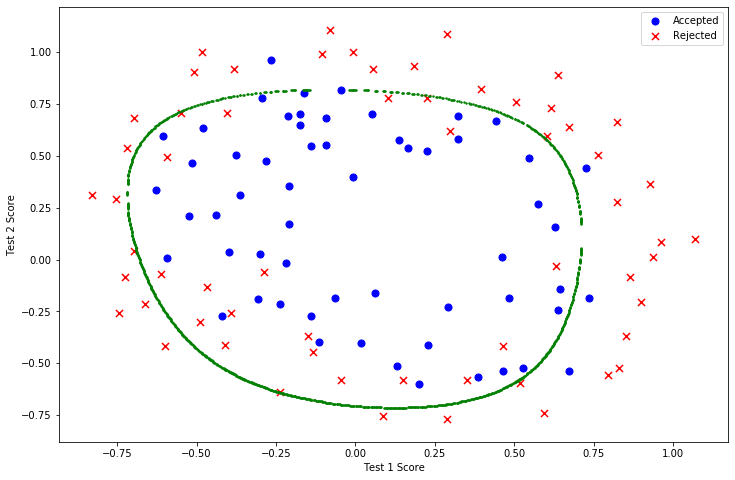

In [209]:
draw_boundary(power=6, l=5)

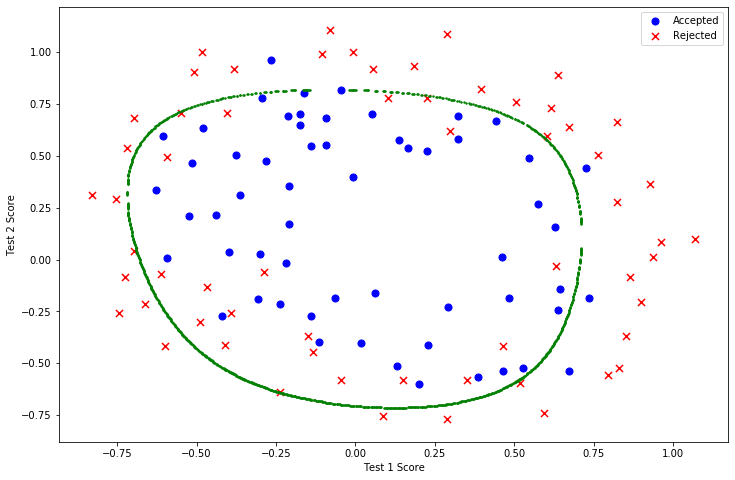

In [210]:
draw_boundary(power=6, l=100)